In [1]:
from qiskit import Aer, transpile, execute
from qiskit import Aer, transpile, execute
from qiskit.circuit import ParameterVector, QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.utils import QuantumInstance
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [2]:
def qiskit_circuit_constructor(weights, data_vector):
    qc = QuantumCircuit(num_qubits, num_qubits)
    
    fmap_bound = fmap.assign_parameters({fmap.parameters[i]: data_vector[i] for i in range(len(data_vector))})
    ansatz_bound = ansatz.assign_parameters({params[i]: weights[i] for i in range(len(weights))})
    
    qc.compose(fmap_bound.compose(ansatz_bound), inplace=True)
    qc.measure(range(num_qubits), range(num_qubits))
    return qc

In [3]:
num_qubits = 4
# оптимальные параметры цепочки получены с запуска на платформе
optimal_params = np.array([5.13291071, 0.36642192, 1.35842704, 3.72701097, 0.91587433, 4.01569385,
                           0.28878311, 5.99237573, 6.09794553, 3.25565942, 3.98712784, 4.79265484,
                           4.76899152, 2.61194111, 4.82431881, 2.62169068])
num_shots=1000
quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'), shots=num_shots)
y_train_pred = []
y_test_pred = []
fmap = ZZFeatureMap(num_qubits, reps=2)
ansatz = RealAmplitudes(num_qubits, reps=3, entanglement='circular')
params = ParameterVector('θ', ansatz.num_parameters)
ansatz.assign_parameters(params, inplace=True)
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')
for data_vector in X_train:
    qc = qiskit_circuit_constructor(optimal_params, data_vector)
    transpiled_circuit = transpile(qc, quantum_instance.backend)
    job = execute(transpiled_circuit, backend=quantum_instance.backend, shots=num_shots)
    result = job.result()
    counts = result.get_counts()
    bitstring = max(list(counts.items()), key=lambda x: x[1])[0]
    if bitstring.count('1') >= bitstring.count('0'):
        y_train_pred.append(1)
    else:
        y_train_pred.append(0)

X_test = np.load('X_test.npy')
Y_test = np.load('Y_test.npy')
for data_vector in X_test:
    qc = qiskit_circuit_constructor(optimal_params, data_vector)
    transpiled_circuit = transpile(qc, quantum_instance.backend)
    job = execute(transpiled_circuit, backend=quantum_instance.backend, shots=num_shots)
    result = job.result()
    counts = result.get_counts()
    bitstring = max(list(counts.items()), key=lambda x: x[1])[0]
    if bitstring.count('1') >= bitstring.count('0'):
        y_test_pred.append(1)
    else:
        y_test_pred.append(0)

print('train accuracy:', accuracy_score(Y_train, y_train_pred))
print('test accuracy:', accuracy_score(Y_test, y_test_pred))

/tmp/ipykernel_104052/4123751112.py:7: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'), shots=num_shots)
/tmp/ipykernel_104052/4123751112.py:7: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'), shots=num_shots)
/tmp/ipykernel_104052/4123751112.py:19: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` fo

train accuracy: 0.5952380952380952
test accuracy: 0.42857142857142855


Text(0.5, 1.0, 'Кривые обучения для QML')

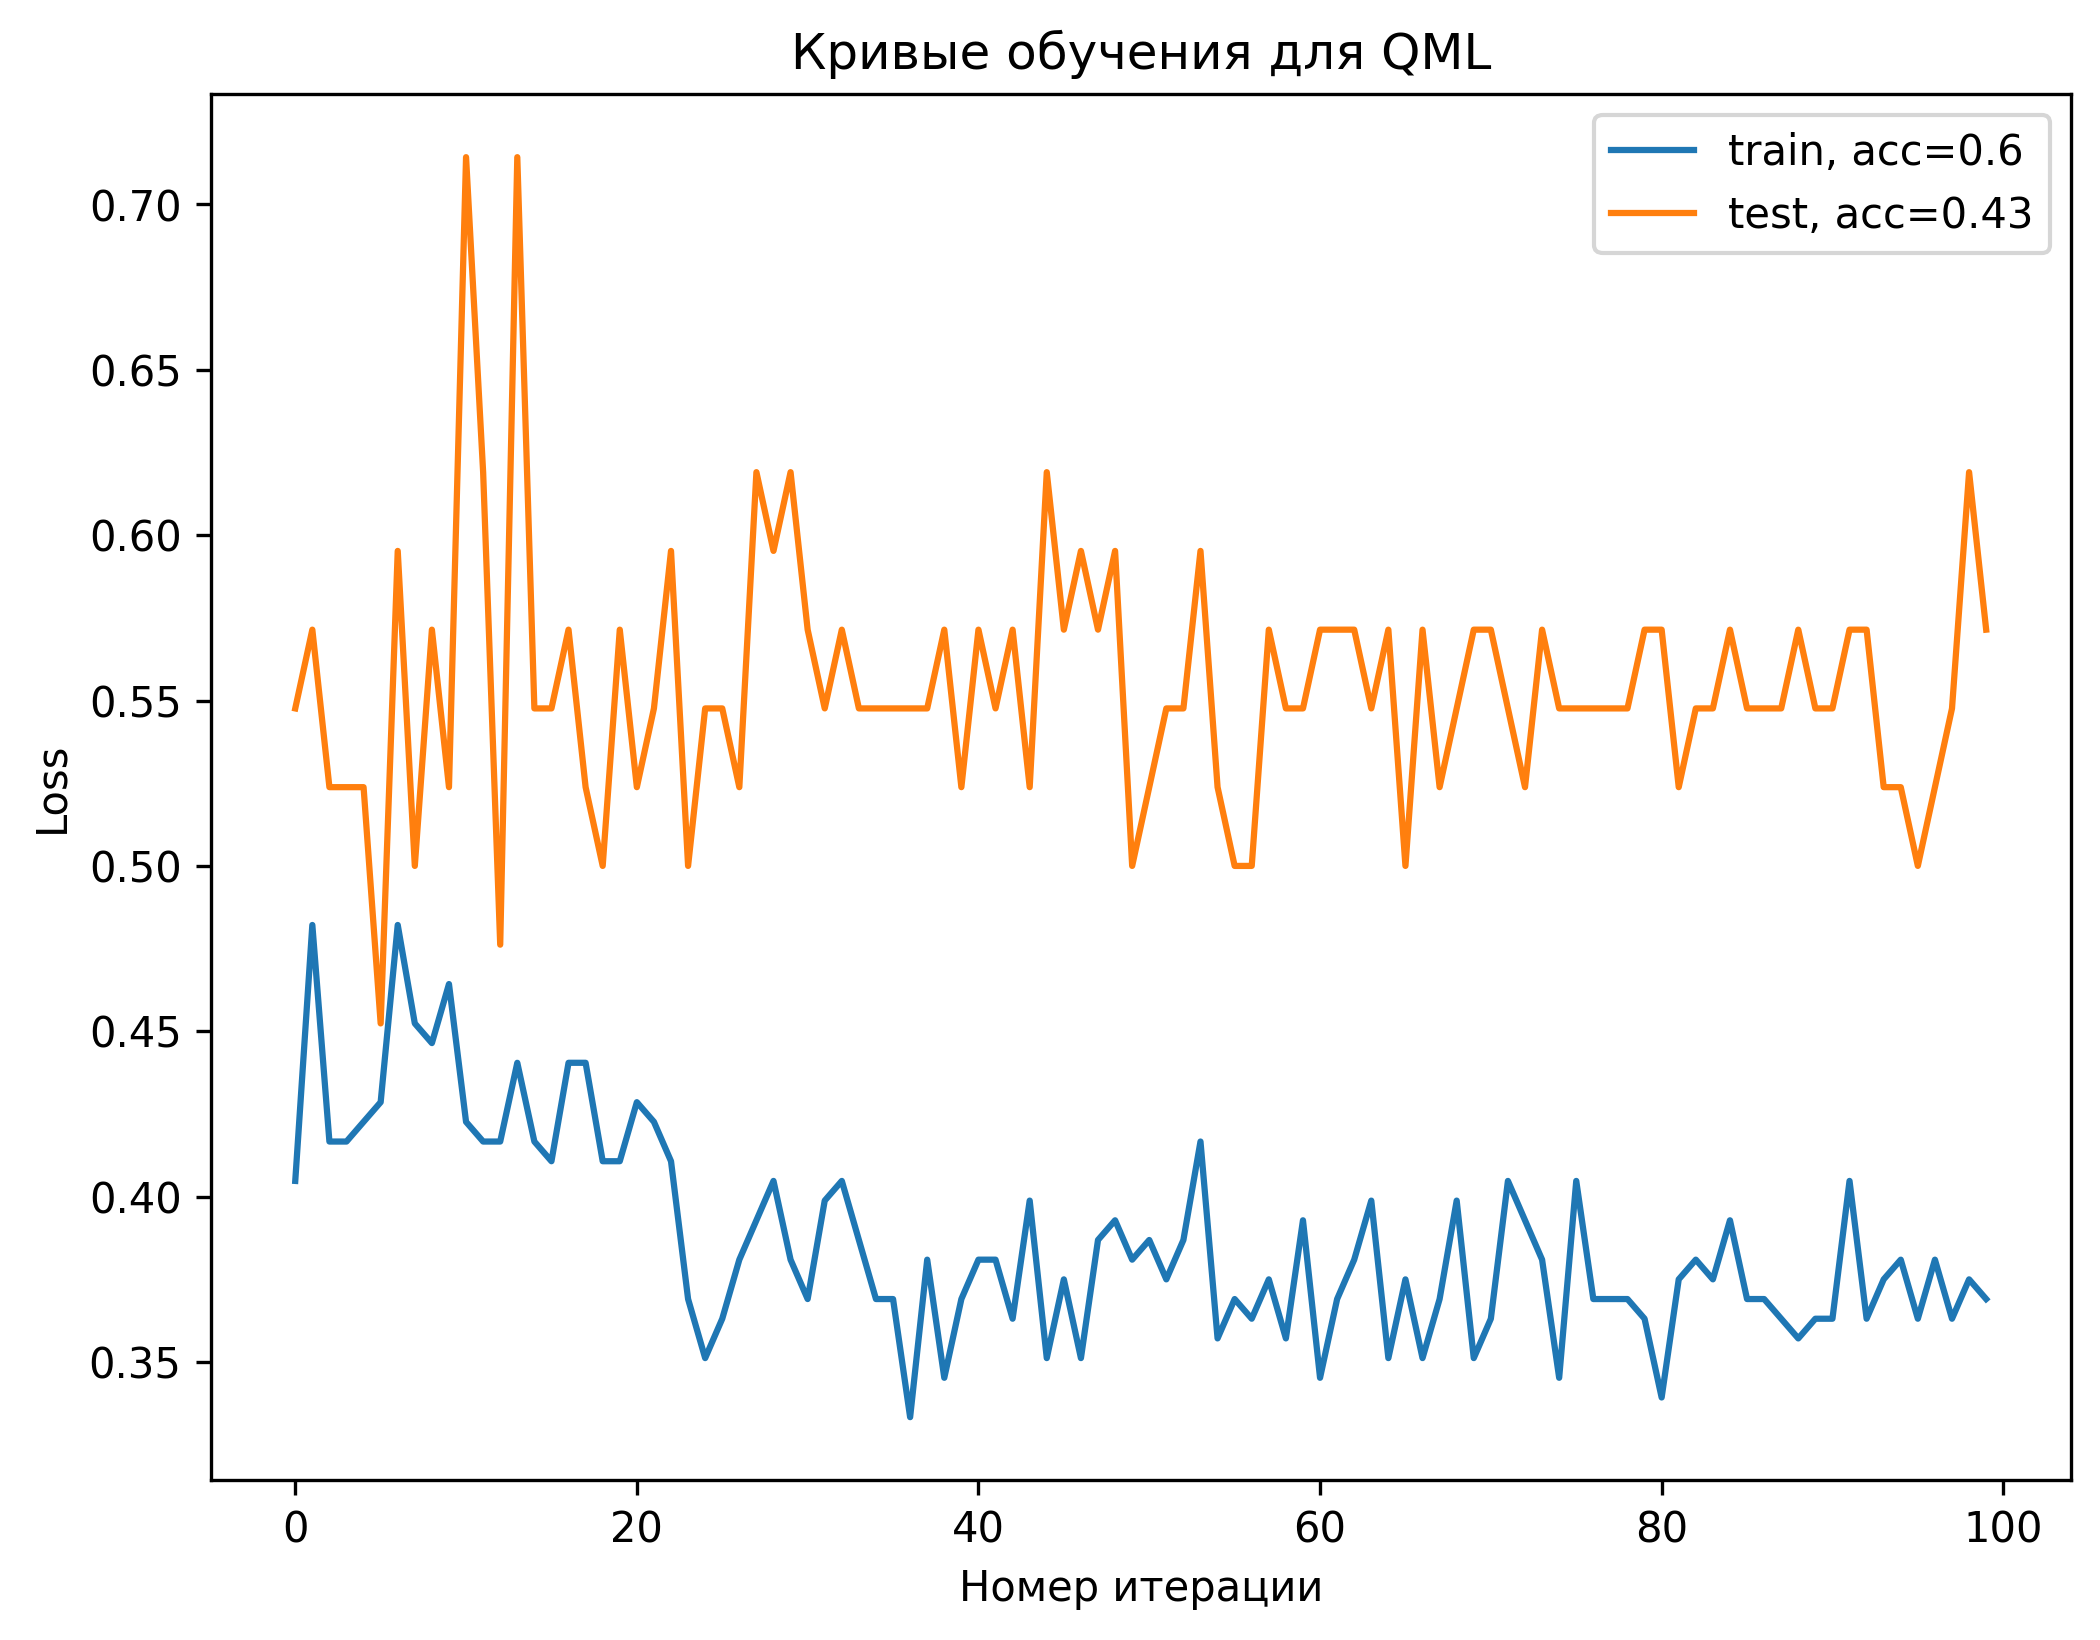

In [4]:
losses_train, losses_test = np.load('losses_train.npy'), np.load('losses_test.npy')
plt.figure(figsize=(8,6), dpi=300)
plt.plot(losses_train, label=f'train, acc={round(accuracy_score(Y_train, y_train_pred), 2)}')
plt.plot((168 / (210 - 168))*losses_test, label=f'test, acc={round(accuracy_score(Y_test, y_test_pred), 2)}')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Номер итерации')
plt.title('Кривые обучения для QML')

Обработка данных на 9 утра

In [10]:
new_compressed_embeddings = np.load('new_compressed_embeddings.npy')
new_label = np.array(['-', '-', '+', '+', '-', '-', '+', '-', '-', '-', '+', '-', '+',
       '+', '-', '+', '-', '+', '+', '-', '-', '-', '+', '+', '+', '+',
       '-', '-', '+', '-', '+', '-', '+', '-', '-', '+', '-', '-', '-',
       '-', '+', '-', '+', '-', '+', '+', '+', '+', '-', '-'],
      dtype=object)
new_label = np.array([0 if y=='-' else 1 for y in new_label])

In [11]:
y_val_pred = []
for data_vector in new_compressed_embeddings:
    qc = qiskit_circuit_constructor(optimal_params, data_vector)
    transpiled_circuit = transpile(qc, quantum_instance.backend)
    job = execute(transpiled_circuit, backend=quantum_instance.backend, shots=num_shots)
    result = job.result()
    counts = result.get_counts()
    bitstring = max(list(counts.items()), key=lambda x: x[1])[0]
    if bitstring.count('1') >= bitstring.count('0'):
        y_val_pred.append(1)
    else:
        y_val_pred.append(0)

/tmp/ipykernel_104052/232552894.py:5: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(transpiled_circuit, backend=quantum_instance.backend, shots=num_shots)


In [12]:
print('Validation quantum accuracy:', accuracy_score(new_label, y_val_pred))

Validation quantum accuracy: 0.52
